<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Manuel Zamorano
- Nombre de alumno 2: Javier Urrutia


### **Link de repositorio de GitHub:**`https://github.com/JUrrutia10/Laboratorios-MDS/tree/main/lab10`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [2]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [3]:
df.shape

(70692, 18)

## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [4]:
!pip install xgboost

1.-

In [ ]:
from matplotlib import pyplot as plt

for column in df.columns:
    plt.figure(figsize=(10, 6))
    value_counts = df[column].value_counts().sort_index()  # Ordena los valores por el índice
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import joblib

In [64]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Dividir en conjunto de entrenamiento (70%) y un conjunto temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto temporal en validación (20%) y prueba (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 0.33 * 0.3 = 0.1

# Identificar las columnas numéricas
numeric_features = X.columns

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

# Crear el pipeline con XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('to_dataframe', FunctionTransformer(func=lambda x: pd.DataFrame(x, columns=numeric_features))),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Entrenar el pipeline con XGBClassifier
xgb_pipeline.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de validación con XGBClassifier
y_val_pred_xgb = xgb_pipeline.predict(X_val)

# Calcular Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_val, y_val_pred_xgb)
precision = precision_score(y_val, y_val_pred_xgb)
recall = recall_score(y_val, y_val_pred_xgb)
f1 = f1_score(y_val, y_val_pred_xgb)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred_xgb)
print(f'Confusion Matrix:\n{conf_matrix}')

# Mostrar un informe de clasificación detallado
class_report = classification_report(y_val, y_val_pred_xgb)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7512140192835527
Precision: 0.7310561444837064
Recall: 0.79054627795075
F1 Score: 0.7596382674916706
Confusion Matrix:
[[5088 2055]
 [1480 5586]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7143
         1.0       0.73      0.79      0.76      7066

    accuracy                           0.75     14209
   macro avg       0.75      0.75      0.75     14209
weighted avg       0.75      0.75      0.75     14209



2.-

#### ¿Es un buen predictor de diabetes?

Para determinar si el modelo es un buen predictor de diabetes, consideremos cada métrica y lo que indican sobre el rendimiento del modelo:

1. **Accuracy (0.751)**:
   - **Interpretación**: El modelo clasifica correctamente el 75.1% de las veces. Esto indica un rendimiento razonable, pero la accuracy por sí sola no es suficiente para evaluar la calidad de un modelo.

2. **Precision (0.731 para la clase 1)**:
   - **Interpretación**: El 73.1% de las instancias predichas como positivas (diabetes) son realmente positivas. Una precision alta es crucial cuando los costos de los falsos positivos son altos.

3. **Recall (0.791 para la clase 1)**:
   - **Interpretación**: El modelo identifica correctamente el 79.1% de las instancias positivas. Una recall alta es importante cuando los costos de los falsos negativos son altos, es decir, cuando es crítico detectar todos los casos positivos, lo cual es el caso.

4. **F1 Score (0.760 para la clase 1)**:
   - **Interpretación**: La F1 score es la media armónica de precision y recall, equilibrando ambos. Un F1 score de 0.760 sugiere un buen equilibrio entre precision y recall.

Por ende, en general, se podría decir que el modelo tiene relativamente un buen rendimiento. Este de todas formas se puede mejorar aún más.

#### ¿Qué buscan explicar las métricas utilizadas?

- **Accuracy**: La proporción de predicciones correctas sobre el total de predicciones. Buena para tener una visión general, pero puede ser engañosa si las clases están desbalanceadas. En este caso, las clases si están balanceadas.
- **Precision**: La proporción de verdaderos positivos sobre el total de predicciones positivas. Es crucial en situaciones donde los falsos positivos son costosos.
- **Recall**: La proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Es crucial en situaciones donde los falsos negativos son costosos (el cual es el caso).
- **F1 Score**: La media armónica de precision y recall. Es útil cuando necesitas un equilibrio entre precision y recall.
- **Confusion Matrix**: Muestra la distribución de predicciones correctas e incorrectas, proporcionando una visión detallada de cómo el modelo está clasificando cada clase.
- **Classification Report**: Un resumen de precision, recall y F1 score para cada clase, así como los promedios macro y ponderados.

#### ¿Las métricas utilizadas permiten asegurar que su modelo haga una buena elección de las features?

Las métricas de rendimiento proporcionan una visión de cuán bien está funcionando el modelo, pero no directamente si las características elegidas son las mejores posibles. Sin embargo, si estas métricas son altas, es un indicio de que las características seleccionadas son útiles.


## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

<Figure size 1000x800 with 0 Axes>

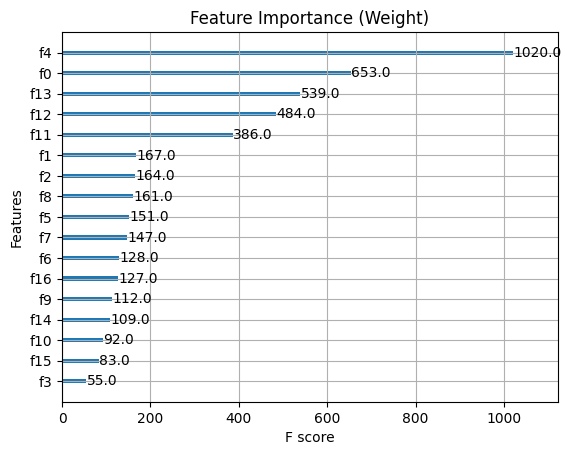

<Figure size 1000x800 with 0 Axes>

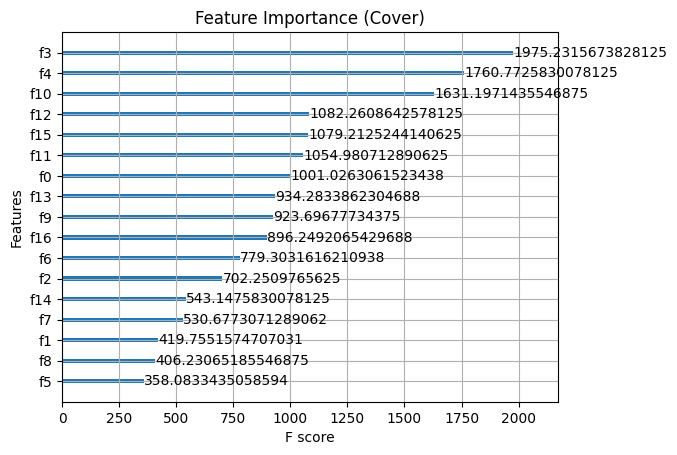

<Figure size 1000x800 with 0 Axes>

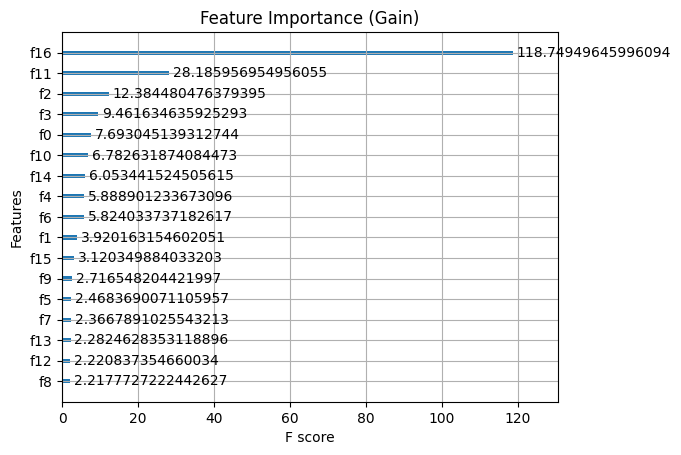

In [65]:
from xgboost import plot_importance

# Extraer el modelo entrenado de XGBClassifier
xgb_model = xgb_pipeline.named_steps['classifier']

# Visualizar la importancia de las características usando 'weight'
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance (Weight)')
plt.show()

# Visualizar la importancia de las características usando 'cover'
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='cover')
plt.title('Feature Importance (Cover)')
plt.show()

# Visualizar la importancia de las características usando 'gain'
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain')
plt.title('Feature Importance (Gain)')
plt.show()

*  **Weight:** Número de veces que una característica se utiliza para dividir los nodos en todos los árboles. Puede ser una medida útil de la importancia de una característica para la precisión global del modelo. Sin embargo, puede **inducir a error** en el caso de características con muchos valores posibles, ya que estas características pueden utilizarse con más frecuencia simplemente porque **hay más oportunidades de dividirlas**.

*  **Cover:** La fracción de las observaciones para las cuales una característica está en los nodos de decisión.

*  **Gain:** La mejora promedio en la precisión del modelo cuando una característica se utiliza en los nodos de decisión.

### ¿Los resultados obtenidos con los diferentes métodos son compatibles?
Las métricas de importancia de características difieren en la magnitud asignada a cada característica, por lo que es posible que que los diferentes métodos están evaluando la importancia de las características de manera ligeramente diferente.

   - Cada método utiliza un criterio diferente para calcular la importancia de las características. Por ejemplo, `weight` se basa en la frecuencia con la que se utiliza una característica para dividir nodos en todos los árboles, mientras que `cover` se basa en la fracción de observaciones para las cuales una característica está en los nodos de decisión, y `gain` se basa en la mejora promedio en la precisión del modelo cuando una característica se utiliza en los nodos de decisión. Estas diferencias en los criterios pueden llevar a discrepancias en la magnitud de las importancias de las características.

   - Algunos métodos pueden ser más sensibles a la escala y la distribución de las características que otros. Por ejemplo, `gain` puede ser más sensible a las características que tienen una mayor variabilidad o que están altamente correlacionadas con la variable objetivo. Esto puede llevar a diferencias en la magnitud de las importancias de las características dependiendo de cómo están escaladas o distribuidas las características en los datos.

   - Algunos métodos pueden ser más sensibles a la presencia de características redundantes o irrelevantes en los datos. Por ejemplo, `weight` puede inflarse por características redundantes, mientras que `gain` puede penalizarlas. Esto puede influir en la magnitud de las importancias de las características, especialmente si hay características que son redundantes o irrelevantes para la tarea de predicción.


### ¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?
Las importancias de características proporcionadas por los métodos `weight`, `cover` y `gain` pueden ser útiles para obtener una idea general de qué características son más influyentes en el modelo.
Sin embargo, la interpretabilidad de un modelo basado en árboles no se limita solo a las importancias de características. La estructura misma del árbol y cómo se toman las decisiones en cada nodo también pueden proporcionar información interpretativa valiosa.
Una debilidad de este método es que las importancias de características pueden ser sesgadas hacia características con alta cardinalidad o características numéricas. Además, pueden pasar por alto interacciones no lineales o dependencias entre características.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

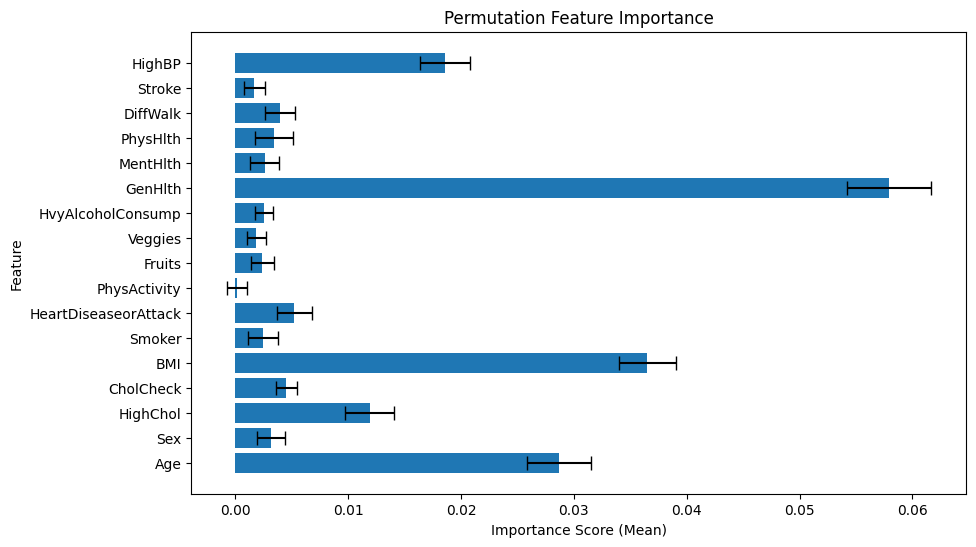

Desviación estándar de los resultados: [0.00286965 0.00125509 0.00216226 0.0009243  0.00252471 0.00133118
 0.00153861 0.00090691 0.00097771 0.00084615 0.00079099 0.00373304
 0.00127299 0.00164606 0.00133832 0.00093831 0.00219738]


In [66]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las características mediante permutación
result = permutation_importance(xgb_pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Obtener la importancia media y la desviación estándar de las importancias de las características
mean_importance = result.importances_mean
std_importance = result.importances_std

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mean_importance, xerr=std_importance, capsize=5)
plt.xlabel('Importance Score (Mean)')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

# Mostrar la desviación estándar de los resultados
print("Desviación estándar de los resultados:", std_importance)

Las características con una barra de error más pequeña (desviación estándar más pequeña) son más consistentemente importantes para el modelo.
Las características con una mediam de puntaje de importancia más alta y una desviación estándar pequeña son las más importantes para el modelo.
Este enfoque proporciona una forma robusta de evaluar la importancia de las características al tener en cuenta la variabilidad en las estimaciones debido a la aleatoriedad en el proceso de permutación.

### ¿Cómo mide la importancia de las features su propuesta?
La propuesta de utilizar `permutation_importance` de scikit-learn para medir la importancia de las características se basa en el concepto de cómo la permutación de cada característica individualmente afecta el rendimiento del modelo. El proceso implica los siguientes pasos:

1. Se permuta cada característica individualmente en los datos de prueba, manteniendo los demás atributos intactos. Esto significa que los valores de una característica se reorganizan aleatoriamente sin cambiar su relación con las otras características.

2. Se evalúa el rendimiento del modelo en los datos de prueba permutados. Esto implica predecir las etiquetas de la variable objetivo utilizando el modelo entrenado con los datos de prueba permutados.

3. Se compara el rendimiento del modelo con los datos de prueba permutados con el rendimiento base del modelo original con los datos de prueba no permutados.

4. La importancia de una característica se calcula como la diferencia en el rendimiento del modelo entre los datos de prueba permutados y los datos de prueba no permutados. Una mayor disminución en el rendimiento indica que la característica es más importante para el modelo.

5. Se repite este proceso varias veces (definido por el parámetro `n_repeats`) para obtener una estimación robusta de la importancia de las características. Luego, se calcula la importancia media y la desviación estándar de las importancias de las características a lo largo de las repeticiones.

### ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
Las características que tienen un mayor impacto son: `GenHlth`, `HighBP`, `BMI`, `Age` y `HighChol`. Estas características representan la salud general, la presión arterial alta, el índice de masa corporal, la edad y el colesterol alto, respectivamente. Estos resultados tienen sentido en el contexto de un modelo de predicción de diabetes, ya que factores como la salud general, la presión arterial, el peso y la edad son conocidos por influir en el riesgo de desarrollar diabetes.


### ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
Se tiene que en el punto anterior se tenían como las 5 features más importantes:
1. Weight:
    - BMI, Age, PhysHlth, MentHlth y GenHlth.

2. Cover:
    - CholCheck, BMI, HuyAlcoholConsump, MentHlth y Stroke.

3. Gain:
    - HighBP, GenHlth, HighCol, Cholcheck y Age.

Comparando los resultados con las importancias de características obtenidas anteriormente utilizando diferentes métodos (peso, cover, gain), podemos ver algunas diferencias en las características identificadas como más importantes, como así bastantes similitudes. Esto puede deberse a las diferentes formas en que cada método evalúa la importancia de las características y cómo responden a las características en los datos. Sin embargo, es importante tener en cuenta que todas estas características pueden desempeñar un papel importante en el modelo y en la predicción de la diabetes, y la combinación de diferentes métodos puede proporcionar una evaluación más completa de la importancia de las características.


### Nombre y explique 3 ventajas y 3 desventajas del método implementado.


#### Ventajas:

1. **Robustez**: La permutación de características es un método robusto para calcular la importancia de las características, ya que no hace suposiciones sobre la distribución de los datos ni sobre la relación entre las características y la variable objetivo. Esto lo hace adecuado para una amplia variedad de conjuntos de datos y modelos.
  
2. **Interpretación intuitiva**: La importancia de las características se mide directamente en términos de cómo afecta la permutación de cada característica al rendimiento del modelo. Esto proporciona una interpretación intuitiva y fácilmente comprensible de la contribución de cada característica a la capacidad predictiva del modelo.

3. **Manejo de interacciones**: Al evaluar la importancia de las características de forma individual, el método de permutación puede capturar tanto efectos lineales como no lineales, así como interacciones entre características. Esto permite una evaluación más completa de la importancia de las características en el modelo.

#### Desventajas:

1. **Alto costo computacional**: El método de permutación requiere ajustar el modelo y evaluar el rendimiento del modelo múltiples veces (una vez por cada característica permutada), lo que puede ser computacionalmente costoso, especialmente para conjuntos de datos grandes o modelos complejos.

2. **Dependencia del modelo**: La interpretación de la importancia de las características mediante permutación puede depender del modelo utilizado. Algunos modelos pueden ser más sensibles a las permutaciones de características que otros, lo que puede afectar la precisión de las estimaciones de importancia.

3. **Sesgo hacia características correlacionadas**: El método de permutación puede tener un sesgo hacia características correlacionadas o redundantes. Si dos características están altamente correlacionadas, la permutación de una de ellas puede no afectar significativamente el rendimiento del modelo, lo que puede subestimar la importancia de ambas características.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [67]:
!pip install shap

In [68]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [69]:
import shap

# Calcular los SHAP values
explainer = shap.Explainer(xgb_pipeline.named_steps['classifier'])
shap_values = explainer(xgb_pipeline.named_steps['preprocessor'].transform(X_test))

# Visualizar los SHAP values
# Summary plot
#shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

# Dependence plot para una característica específica
#shap.dependence_plot('BMI', shap_values.values, features=X_test, feature_names=X.columns)

In [70]:
shap_values

.values =
array([[-1.7456086 , -0.415876  ,  0.33380142, ..., -0.15234755,
        -0.00411045,  0.246965  ],
       [ 0.09380282, -0.06717047,  0.23208027, ..., -0.05702486,
        -0.02909459,  0.4515198 ],
       [ 0.27622065, -0.07349112, -0.3270603 , ...,  0.11849166,
        -0.0300687 , -0.59842426],
       ...,
       [ 0.3910395 ,  0.14138898,  0.23625004, ..., -0.06913486,
        -0.01271921,  0.44199103],
       [ 0.5352981 ,  0.15768099,  0.18336836, ..., -0.04202719,
        -0.01059032, -0.55024374],
       [-0.08664936, -0.05984485,  0.24201784, ...,  0.14405513,
         0.00737395,  0.5299573 ]], dtype=float32)

.base_values =
array([-0.00885369, -0.00885369, -0.00885369, ..., -0.00885369,
       -0.00885369, -0.00885369], dtype=float32)

.data =
array([[-1.95591422,  1.08743176,  0.95262056, ..., -0.57906149,
        -0.25700576,  0.87991818],
       [ 0.14661567, -0.91959794,  0.95262056, ..., -0.57906149,
        -0.25700576,  0.87991818],
       [ 0.14661567, -0.

### ¿Qué representa cada número en su resultado?

* `shap_values.values`: Este array contiene los valores SHAP para cada característica y cada instancia (paciente). Cada valor en este array representa la contribución de una característica específica a la predicción del modelo para una instancia en particular. Por ejemplo, un valor SHAP positivo indica que la característica está empujando la predicción hacia la clase positiva (diabetes), mientras que un valor SHAP negativo indica que la característica está empujando la predicción hacia la clase negativa (no diabetes).

* `shap_values.base_values`: Este array contiene el valor base o el valor esperado de la predicción si no se conociera ninguna característica del paciente. Este valor es la predicción promedio del modelo en todo el conjunto de datos. En este caso, base_values es constante y tiene un valor de -0.00885369, lo que indica que este es el valor base de las predicciones del modelo en términos de log-odds (ya que se está usando un clasificador XGBoost).

* `shap_values.data`: Este array contiene los valores de las características para cada instancia en el conjunto de datos. Estos son los datos de entrada que se están evaluando para calcular los valores SHAP. Cada fila corresponde a una instancia (paciente) y cada columna a una característica del conjunto de datos.

### ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

Un valor SHAP positivo indica que la característica está contribuyendo positivamente a la predicción de la clase 1 (diabetes). Cuanto mayor sea el valor positivo, mayor será la influencia de la característica en aumentar la probabilidad de predecir diabetes. Por otro lado, un valor SHAP negativo indica que la característica está contribuyendo negativamente a la predicción de la clase 1 (diabetes). Cuanto mayor sea el valor negativo, mayor será la influencia de la característica en disminuir la probabilidad de predecir diabetes.

### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

In [71]:
# Visualizar los SHAP values para la instancia 1
idx = 1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[idx,:], X_test.iloc[idx,:], link="logit")

In [72]:
# Visualizar los SHAP values para la instancia 9
idx = 9
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[idx,:], X_test.iloc[idx,:], link="logit")

In [73]:
# Visualizar los SHAP values para la instancia 150
idx = 150
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[idx,:], X_test.iloc[idx,:], link="logit")

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

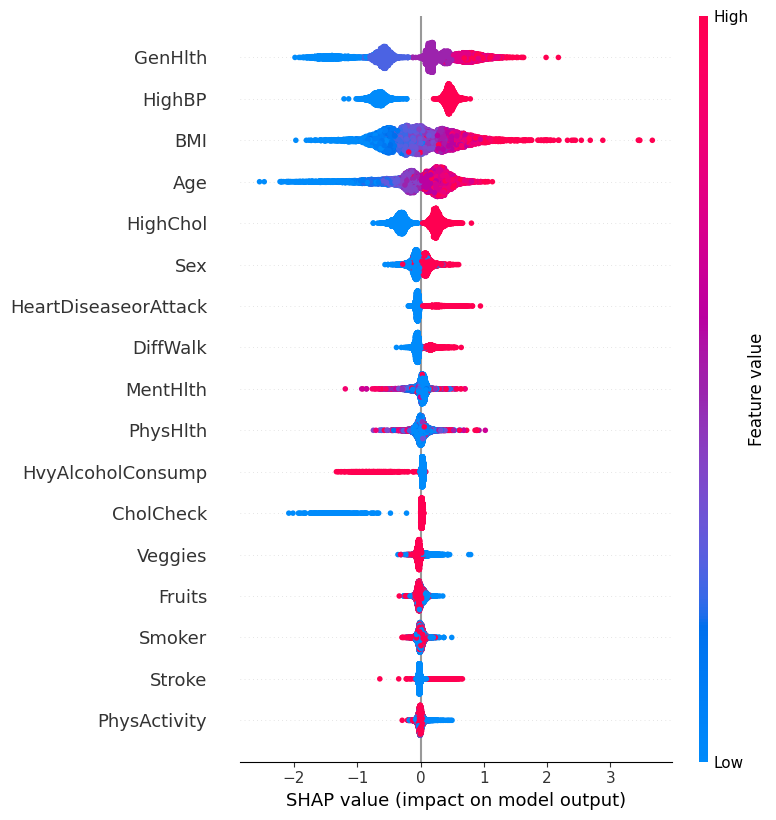

In [74]:
shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)

Como el gráfico muestra que GenHlth, HighBP, BMI, Age y HighChol son las características más importantes, podemos interpretar lo siguiente:

* GenHlth: La salud general tiene un impacto significativo en la predicción de diabetes. Valores altos o bajos de esta característica pueden aumentar o disminuir la probabilidad de tener diabetes.
*  HighBP: La presión arterial alta es un fuerte predictor de diabetes. Los pacientes con presión arterial alta tienen una mayor probabilidad de ser diagnosticados con diabetes.
*  BMI: El índice de masa corporal también juega un papel crucial. Un BMI alto aumenta la probabilidad de diabetes.
*  Age: La edad es un predictor importante, con valores más altos generalmente asociados con un mayor riesgo de diabetes.
*  HighChol: El colesterol alto también contribuye significativamente a la predicción, indicando que niveles altos de colesterol están asociados con un mayor riesgo de diabetes.

### ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

La principal diferencia es el signo y valor específico, ya que para el caso de una instancia se puede ver el valor particular de cada feature para esa instancia, en cambio el global se ve cómo se comporta para todas las instancias y principalmente la variabilidad y distribución de sus valores, así se puede identificar cuales afectan mas para la decisión y cuales tienen en general un score cercano a cero.

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

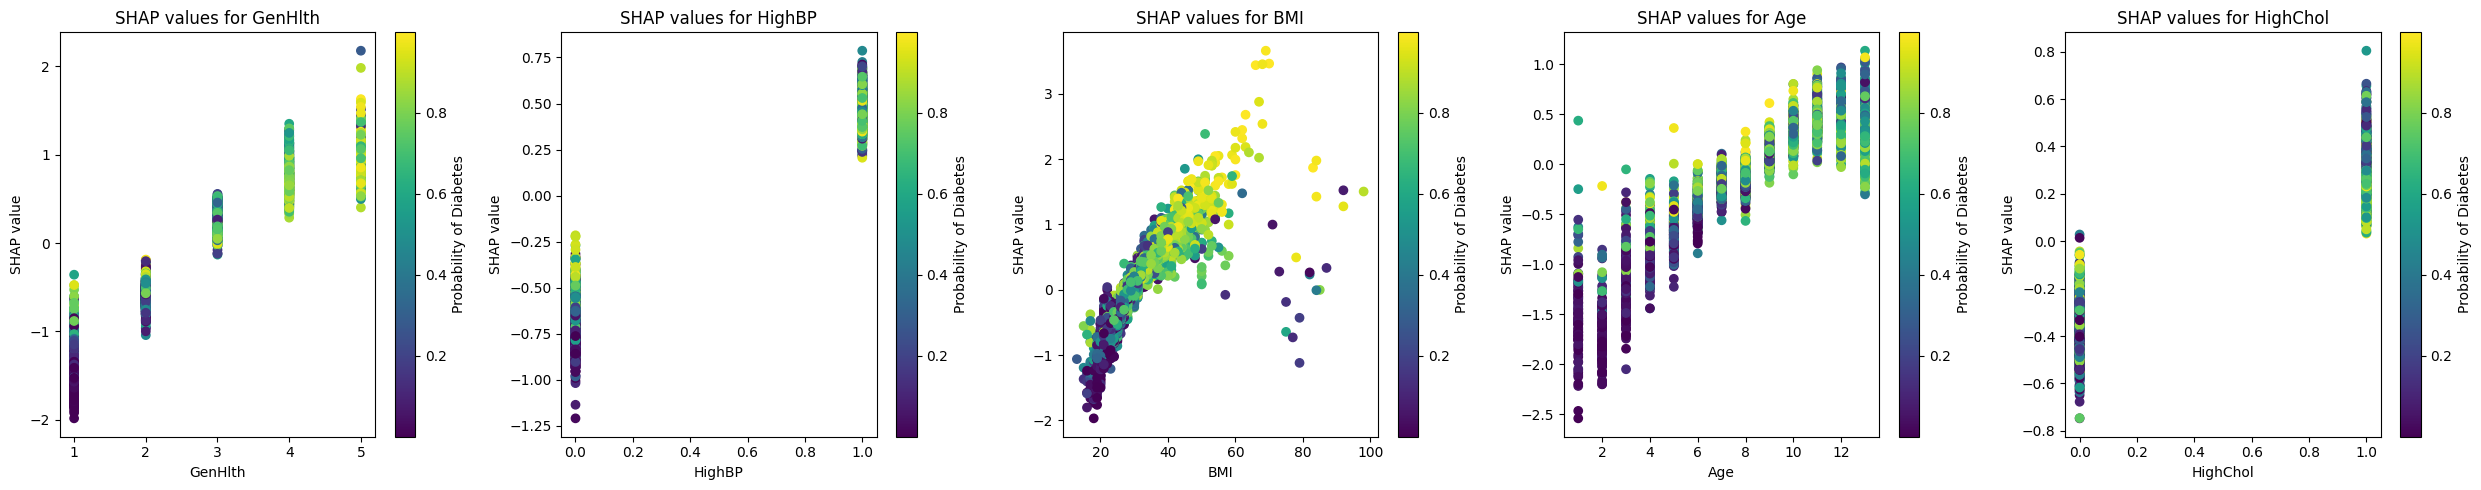

In [75]:
diabetes_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

important_features = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol']

shap_values_array = shap_values.values

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, feature in enumerate(important_features):
    feature_idx = X_test.columns.get_loc(feature)
    axs[i].scatter(X_test[feature], shap_values_array[:, feature_idx], c=diabetes_prob, cmap='viridis')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('SHAP value')
    axs[i].set_title(f'SHAP values for {feature}')
    plt.colorbar(axs[i].collections[0], ax=axs[i], label='Probability of Diabetes')

plt.tight_layout()
plt.show()

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

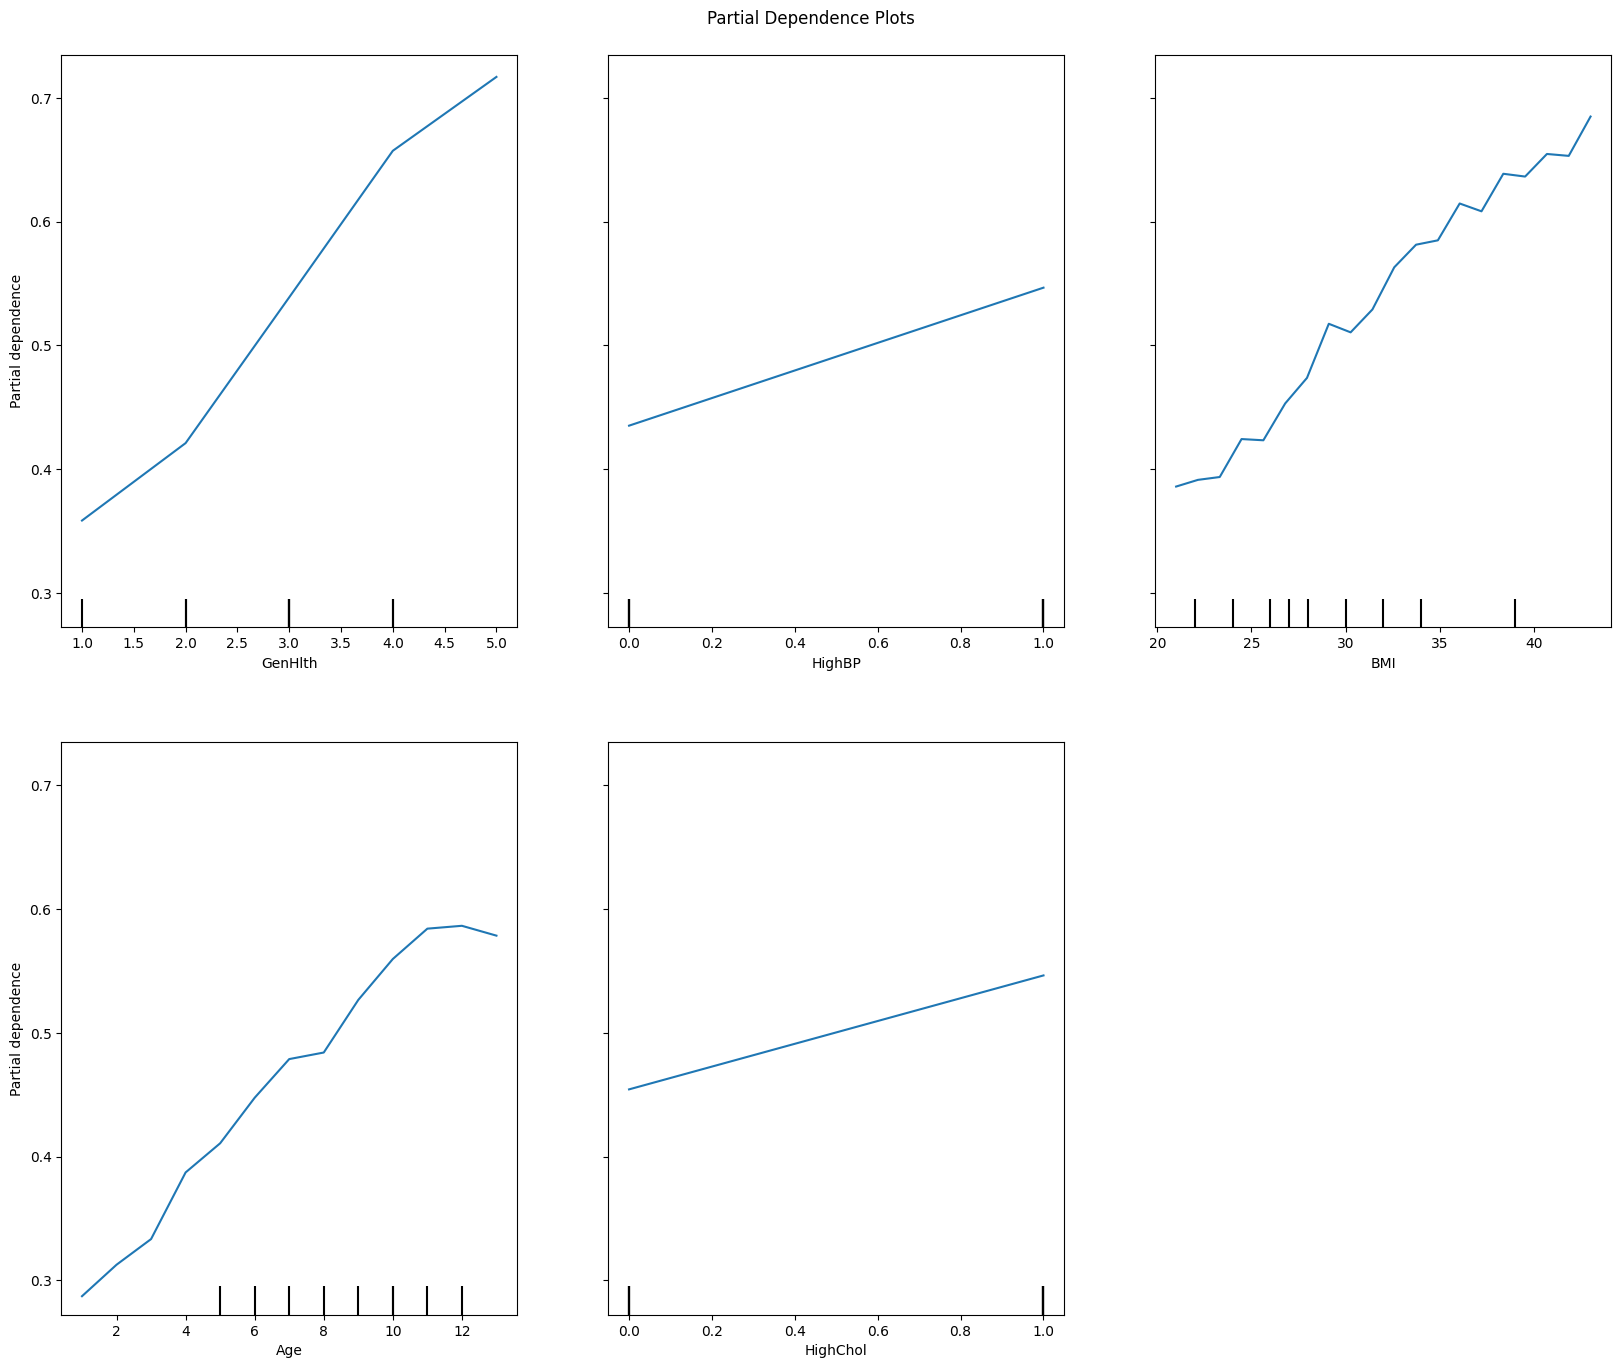

In [76]:
from sklearn.inspection import PartialDependenceDisplay

# Submuestra de 1000 observaciones
X_sample = X_test.sample(1000, random_state=42)
y_sample = y_test.loc[X_sample.index]

# Seleccionar las características más importantes
important_features = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol']

# Crear el Partial Dependence Plot
fig, ax = plt.subplots(figsize=(20, 15))

PartialDependenceDisplay.from_estimator(xgb_pipeline, X_sample, features=important_features, ax=ax, grid_resolution=20)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.95)  # Ajustar el espacio superior del gráfico
plt.show()

Tal como se esperaba estas variables muestran una dependencia parcial creciente, a mas valor de las variables mayor es la probabilidad de diabetes, la edad presenta una pequeña caida en los valores mas grandes, ademas BMI muestra varios cambios pero siempre con una tendencia al alza, para las otras tres variables son 100% crecientes

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [77]:
from alibi.explainers import AnchorTabular

In [94]:
# Creamos la función de predicción
def predict_fn(x):
    return xgb_pipeline.predict(pd.DataFrame(x, columns=X_train.columns))

# Instanciamos Anchor usando la función creada
explainer = AnchorTabular(predict_fn, X_train.columns, seed=1)

# Ajustamos el explainer sobre los datos
explainer.fit(X_train.to_numpy())

# Función para explicar una predicción
def explain_prediction(idx):
    print(f"Explicando predicción para la observación {idx}:")
    obs = np.array(X_test.iloc[idx], ndmin=2)  # Convertimos la observación en un array
    explanation = explainer.explain(obs, threshold=0.95)  # Generamos el anchor
    print('Prediction:', predict_fn(obs)[0])  # Obtenemos la predicción del modelo
    print('Anchor:', ' AND '.join(explanation.anchor))  # Obtenemos la regla
    print('Precision:', explanation.precision)  # Obtenemos la precisión
    print('Coverage:', explanation.coverage)  # Obtenemos la cobertura
    print('\n')

# Explicamos la predicción para las observaciones 1000, 3001 y 5751
idx_list = [1000, 3001, 5751]
for idx in idx_list:
    explain_prediction(idx)

Explicando predicción para la observación 1000:
Prediction: 1
Anchor: GenHlth > 3.00 AND HighBP > 0.00
Precision: 0.9508196721311475
Coverage: 0.2049


Explicando predicción para la observación 3001:
Prediction: 1
Anchor: GenHlth > 3.00 AND HighBP > 0.00 AND HeartDiseaseorAttack > 0.00
Precision: 0.98
Coverage: 0.0654


Explicando predicción para la observación 5751:
Prediction: 1
Anchor: GenHlth > 3.00 AND BMI > 33.00 AND Age > 7.00
Precision: 1.0
Coverage: 0.0668




para la regla de la primera observacion, se ve que afecta cerca del 20% de los datos, esto es al rededor de 10000, y su precision es del 95%, para las siguientes reglas la precision es mayor 98% o incluso 100% pero su covertura es bastante menor, cerca del 6,5% y 6,6% respectivamente por lo que son mas precisas pero menos generalizables que la primera.

En cuanto al sentido de las tres estan bien, ya que las features seleccionadas para construir las reglas son las esperadas, son las mismas que se vieron en los pasos anteriores como GenHlth, BMI, HighBP, etc.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Los mejores métodos son los agnósticos ya que la información que entregan no depende del modelo, por otra parte para este caso el mejor son los de tipo local pero mostrados globalmente, es decir, utilizando Shap, ya que entregan mucha más información, mostrando cómo afecta cada feature a la probabilidad de clase, además de mostrar la relación entre los valores de los features y el valor de la clasificación. Permitiendo de mejor forma seleccionar las features más importantes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>